In [144]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File('lms_fun-v2.hdf5','r') 
list(f.keys())
#list(f1.keys())

['matched_10_v',
 'matched_10_x',
 'matched_10_y',
 'matched_10_z',
 'matched_3_v',
 'matched_3_x',
 'matched_3_y',
 'matched_3_z',
 'mismatched_v',
 'mismatched_x',
 'mismatched_y',
 'time_varying_coefficents',
 'time_varying_x',
 'time_varying_y',
 'time_varying_z']

In [145]:
matched_10_x=f['matched_10_x']
matched_10_z=f['matched_10_z']
matched_3_x=f['matched_3_x']
matched_3_z=f['matched_3_z']
m10_x=np.array(matched_10_x)
m10_z=np.array(matched_10_z)
m3_x=np.array(matched_3_x)
m3_z=np.array(matched_3_z)

In [146]:
# input denmension is 501, means 501 features of data each
# senquence of data is 600, means there are 600 data inall

In [147]:
input_dim = m3_z.shape[1]
w_init = np.random.randn(input_dim ,3)/ np.sqrt(input_dim)
w_init[0,1]=0
w_init[0,2]=0
w_init[1,2]=0

In [171]:
def LMS(w_init,x,y):
    n_iter=x.shape[0]
    n_node=x.shape[1]
    w_last=w_init
    w_update=np.zeros((n_node,3),float)
    error_meansqr=np.zeros((n_node,1),float)
    errsqr=np.zeros((n_iter,n_node),float)
    err=np.zeros((n_iter,n_node))
    for i in range(0,n_iter):
        for j in range(0,n_node):
            if j==0:
                err[i,j]=y[i,j]-w_last[j,0]*x[i,j]
            elif j==1:
                err[i,j]=y[i,j]-w_last[j,0]*x[i,j]-w_last[j,1]*x[i,j-1]
            else:
                err[i,j]=y[i,j]-w_last[j,0]*x[i,j]-w_last[j,1]*x[i,j-1]-w_last[j,2]*x[i,j-2]
            delta=np.array([x[i,j],x[i,j-1],x[i,j-2]])
            w_update[j,:]=w_last[j,:]+ eta * err[i,j] * delta.transpose()
            w_last=w_update
            errsqr[i,j]=err[i,j]*err[i,j]
    error_meansqr=errsqr.mean(axis=0)
    return w_update,error_meansqr

Text(0.5, 1.0, 'MSE with 3dB matched data (eta=0.15)')

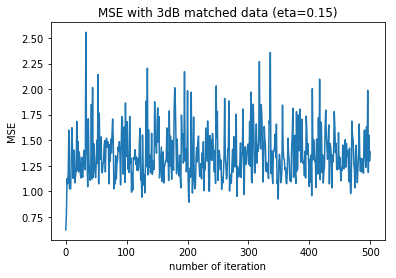

In [173]:
eta=0.3
w=LMS(w_init,m3_x,m3_z)
#print( w[0].shape)
plt.plot(w[1])
mse_3_15=w[1]
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 3dB matched data (eta=0.15)')

In [174]:
print(w[1].shape)

(501,)


Text(0.5, 1.0, 'MSE with 10dB matched data (eta=0.15)')

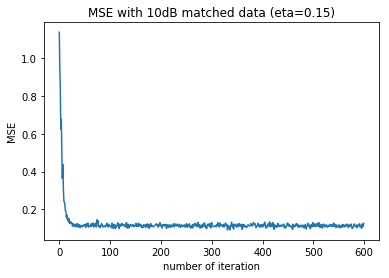

In [150]:
eta=0.15
w=LMS(w_init,m10_x,m10_z)
#print( w[0].shape)
plt.plot(w[1])
mse_10_15=w[1]
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 10dB matched data (eta=0.15)')

Text(0.5, 1.0, 'MSE with 3dB matched data (eta=0.05)')

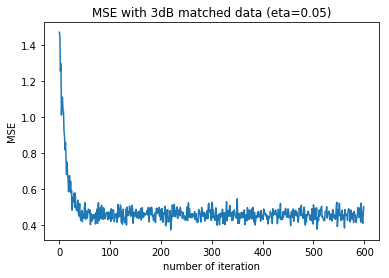

In [151]:
eta=0.05
w=LMS(w_init,m3_x,m3_z)
#print( w[0].shape)
plt.plot(w[1])
mse_3_5=w[1]
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 3dB matched data (eta=0.05)')

Text(0.5, 1.0, 'MSE with 10dB matched data (eta=0.05)')

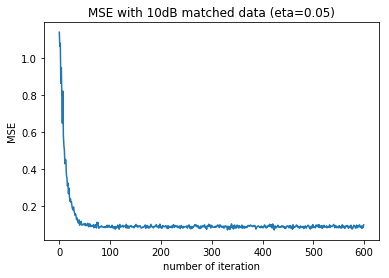

In [152]:
eta=0.05
w=LMS(w_init,m10_x,m10_z)
#print( w[0].shape)
plt.plot(w[1])
mse_10_5=w[1]
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 10dB matched data (eta=0.05)')

Text(0.5, 1.0, 'MSE comparasion')

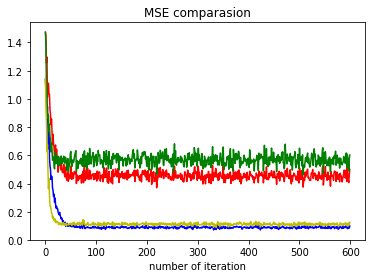

In [153]:
plt.plot(mse_3_5,'r',mse_10_5,'b',mse_3_15,'g',mse_10_15,'y')
plt.xlabel('number of iteration')
#plt.legend(mse_3_5,mse_3_15)
plt.title('MSE comparasion')


(501, 3)


Text(0.5, 1.0, 'MSE in eta=0.33 and 0.34 with 10dB')

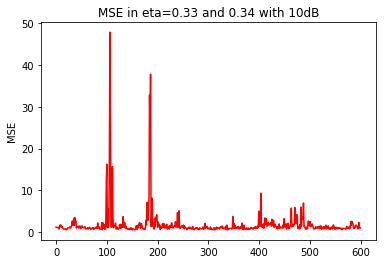

In [156]:
eta=0.4
w=LMS(w_init,m10_x,m10_z)
mse_33=w[1]
eta=0.34
w=LMS(w_init,m10_x,m10_z)
mse_34=w[1]
print( w[0].shape)
plt.plot(mse_33,'r')
plt.ylabel('MSE')
plt.title('MSE in eta=0.33 and 0.34 with 10dB')

Text(0.5, 1.0, 'MSE in eta=0.28 and 0.29 with 3dB')

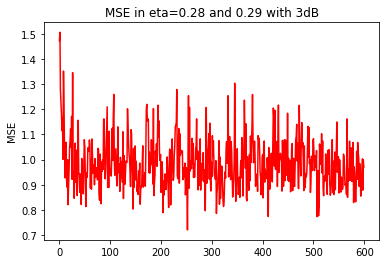

In [140]:
eta=0.28
w=LMS(w_init,m3_x,m3_z)
mse_33=w[1]
eta=0.29
w=LMS(w_init,m3_x,m3_z)
mse_34=w[1]
#print( w[0].shape)
plt.plot(mse_33,'r')
#plt.plot(mse_33,'r')
plt.ylabel('MSE')
plt.title('MSE in eta=0.28 and 0.29 with 3dB')

In [141]:
i=50;j=60
a=np.array([m3_x[i,j],m3_x[i,j-1],m3_x[i,j-2]])
print(w_init.shape)

(501, 3)


In [142]:
## P3.3 above##

In [143]:
tv_coef=f[ 'time_varying_coefficents']
tv_x=f[ 'time_varying_x']
tv_y=f[ 'time_varying_y']
tv_z=f[ 'time_varying_z']


[ 1.  -0.5 -0.5]


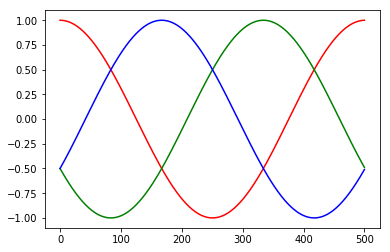

In [92]:
plt.plot(tv_coef[:,0],'r',tv_coef[:,1],'g',tv_coef[:,2],'b')
print(tv_coef[0])

In [125]:
w_init=tv_coef[0,:]
print(w_init)
print(tv_z.shape)


[ 1.  -0.5 -0.5]
(503,)


In [115]:
def LMS_one(w_init,x,y):
    n_node=x.shape[0]
    err=np.zeros((n_node,1))
    w_update=np.zeros((n_node,3))
    w_update[0,:]=w_init
    for j in range(0,n_node):
        if j==0:
            err[j,0]=y[j,0]-w_init[0,0]*x[j,0]
        elif j==1:
            err[j,0]=y[j,0]-w_update[j-1,0]*x[j,0]-w_update[j-1,1]*x[j-1,0]
        else:
            err[j,0]=y[j,0]-w_update[j-1,0]*x[j,0]-w_update[j-2,0]*x[j-1,0]-w_update[j-3,0]*x[j-2,0]
        delta=np.array([x[i,j],x[i,j-1],x[i,j-2]])
        w_update[j,:]=w_last[j,:]+ eta * err[j,0] * delta.transpose()
    return w_update,error_meansqr

In [116]:
w=LMS_one(w_init,tv_x,tv_z)

TypeError: Argument sequence too long

In [ ]:
mismatched_x=f['matched']
matched_10_z=f['matched_10_z']